# Getting the data from Fred | St.louisfed

* API Key: ✅
* Experiment and test the API: ✅
* Download:
  * Real GDP ✅ ❗
  * Nominal GDP ✅ ❗
  * CPI ✅
  * Household Income
  * Unemployment Rate ✅
  * Residential Property price index ✅
  * Equity Price Index
  * Bank Rate
  * IG Corporate bond spread
  * HY Corporate bond spread
  * 5 years nominal Gilt yields
  * 10 years nominal Gilt yields
  * 3 months LIBOR
  * overnight SONIA

In [63]:
!pip install fredapi > /dev/null

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px

from fredapi import Fred

fred_key = '1c28259d2dc6205f8180799ff53ce698'

In [65]:
fred = Fred(api_key=fred_key)

id                                                            CLVMNACSCAB1GQUK
realtime_start                                                      2022-07-05
realtime_end                                                        2022-07-05
title                           Real Gross Domestic Product for United Kingdom
observation_start                                                   1975-01-01
observation_end                                                     2020-07-01
frequency                                                            Quarterly
frequency_short                                                              Q
units                               Millions of Chained 2010 National Currency
units_short                                Mil. of Chn. 2010 National Currency
seasonal_adjustment                                        Seasonally Adjusted
seasonal_adjustment_short                                                   SA
last_updated                                        

****************************************************************************************************


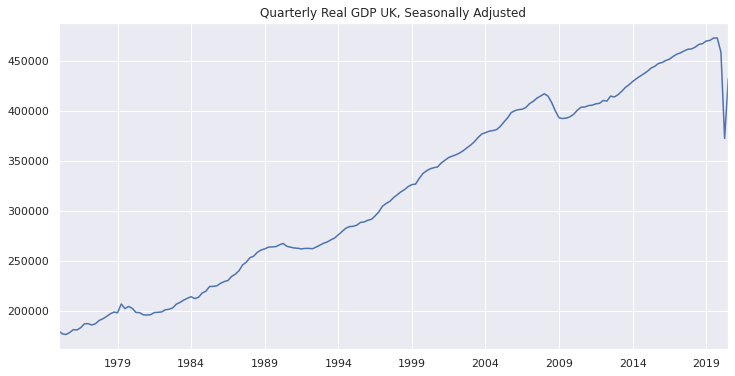

In [33]:
uk_realGDP_q = fred.get_series('CLVMNACSCAB1GQUK',observation_start='1975-01-01')

display(fred.get_series_info('CLVMNACSCAB1GQUK'))
print('*'*100)
uk_realGDP_q.plot(figsize=(12,6),title='Quarterly Real GDP UK, Seasonally Adjusted');

UK Quartely Real GDP, Seasonaly adjusted


id                                                            CLVMNACSCAB1GQUK
realtime_start                                                      2022-07-04
realtime_end                                                        2022-07-04
title                           Real Gross Domestic Product for United Kingdom
observation_start                                                   1975-01-01
observation_end                                                     2020-07-01
frequency                                                            Quarterly
frequency_short                                                              Q
units                               Millions of Chained 2010 National Currency
units_short                                Mil. of Chn. 2010 National Currency
seasonal_adjustment                                        Seasonally Adjusted
seasonal_adjustment_short                                                   SA
last_updated                                        

----------------------------------------------------------------------------------------------------


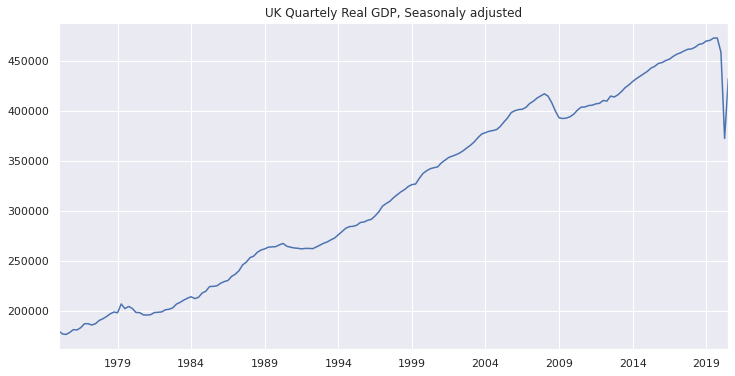

UK Quartely Nominal GDP, seasonaly adjusted


id                                                               NGDPSAXDCGBQ
realtime_start                                                     2022-07-04
realtime_end                                                       2022-07-04
title                        Nominal Gross Domestic Product for Great Britain
observation_start                                                  1955-01-01
observation_end                                                    2022-01-01
frequency                                                           Quarterly
frequency_short                                                             Q
units                                                       Domestic Currency
units_short                                                 Domestic Currency
seasonal_adjustment                                       Seasonally Adjusted
seasonal_adjustment_short                                                  SA
last_updated                                           2022-05-3

----------------------------------------------------------------------------------------------------


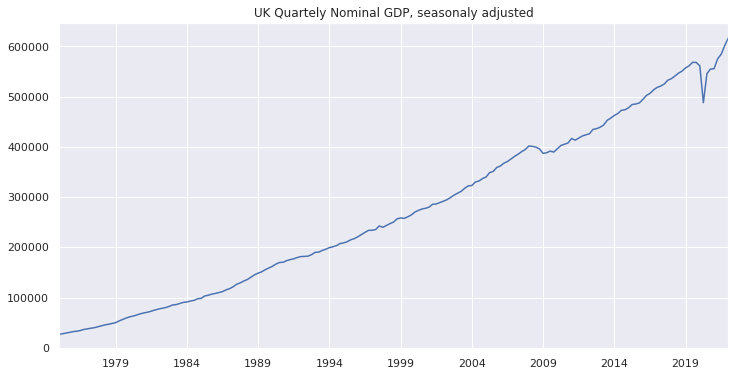

UK Quartely CPI, Not Seasonaly Adjusted


id                                                             GBRCPIALLQINMEI
realtime_start                                                      2022-07-04
realtime_end                                                        2022-07-04
title                        Consumer Price Index of All Items in the Unite...
observation_start                                                   1960-01-01
observation_end                                                     2022-01-01
frequency                                                            Quarterly
frequency_short                                                              Q
units                                                           Index 2015=100
units_short                                                     Index 2015=100
seasonal_adjustment                                    Not Seasonally Adjusted
seasonal_adjustment_short                                                  NSA
last_updated                                        

----------------------------------------------------------------------------------------------------


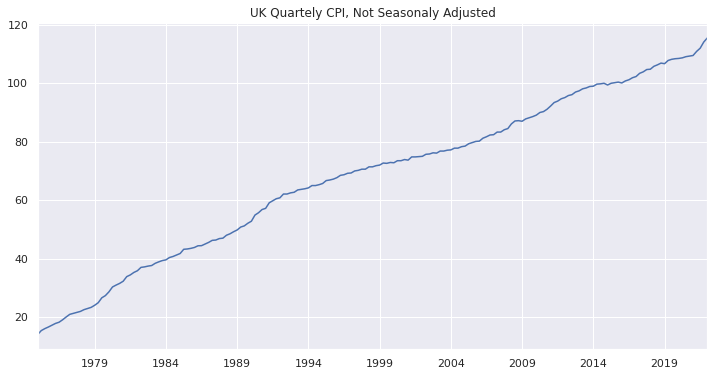

UK Quarterly Unemployment rate UK Age 15-64, Seasonally Adjusted


id                                                             LRUN64TTGBQ156S
realtime_start                                                      2022-07-04
realtime_end                                                        2022-07-04
title                        Unemployment Rate: Aged 15-64: All Persons for...
observation_start                                                   1971-01-01
observation_end                                                     2022-01-01
frequency                                                            Quarterly
frequency_short                                                              Q
units                                                                  Percent
units_short                                                                  %
seasonal_adjustment                                        Seasonally Adjusted
seasonal_adjustment_short                                                   SA
last_updated                                        

----------------------------------------------------------------------------------------------------


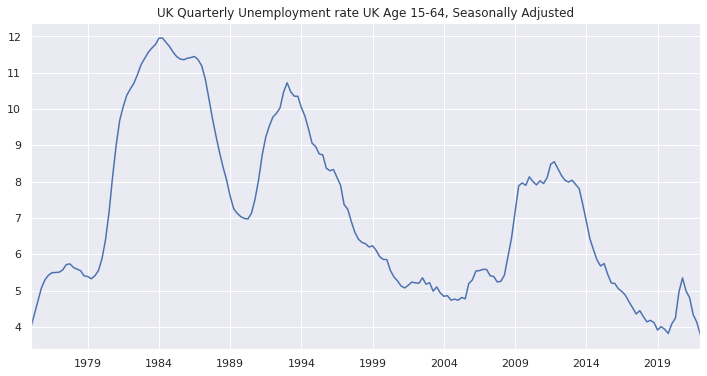

UK Quarterly Residential Prop Price, Not Seasonally adjusted


id                                                                  QGBN628BIS
realtime_start                                                      2022-07-04
realtime_end                                                        2022-07-04
title                           Residential Property Prices for United Kingdom
observation_start                                                   1968-04-01
observation_end                                                     2022-01-01
frequency                                                            Quarterly
frequency_short                                                              Q
units                                                           Index 2010=100
units_short                                                     Index 2010=100
seasonal_adjustment                                    Not Seasonally Adjusted
seasonal_adjustment_short                                                  NSA
last_updated                                        

----------------------------------------------------------------------------------------------------


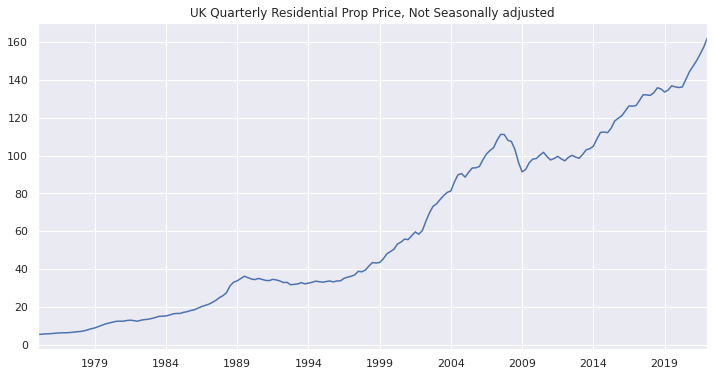

In [20]:
list_of_requests = {'UK Quartely Real GDP, Seasonaly adjusted':'CLVMNACSCAB1GQUK',
                    #'UK Quartley Current Price GDP, Seasonaly adjusted':'GBRGDPNQDSMEI',
                    'UK Quartely Nominal GDP, seasonaly adjusted':'NGDPSAXDCGBQ',
                    'UK Quartely CPI, Not Seasonaly Adjusted':'GBRCPIALLQINMEI',
                    'UK Quarterly Unemployment rate UK Age 15-64, Seasonally Adjusted':'LRUN64TTGBQ156S',
                    'UK Quarterly Residential Prop Price, Not Seasonally adjusted':'QGBN628BIS'}



for key, value in list_of_requests.items():
  print(key)
  data = fred.get_series(value, observation_start='1975-01-01',frequency='q')
  display(fred.get_series_info(value))
  print('-'*100)
  data.plot(figsize=(12,6),title=key)
  plt.show()
  print('='*100)


In [ ]:
#fred.search('real gdp')

In [21]:
all_results = []

for key, value in list_of_requests.items():
  res = fred.get_series(value,observation_start='1975-01-01')
  res = res.to_frame(name=key)
  all_results.append(res)

uk_economic = pd.concat(all_results,axis=1)
uk_economic.head(20)


,"UK Quartely Real GDP, Seasonaly adjusted","UK Quartely Nominal GDP, seasonaly adjusted","UK Quartely CPI, Not Seasonaly Adjusted","UK Quarterly Unemployment rate UK Age 15-64, Seasonally Adjusted","UK Quarterly Residential Prop Price, Not Seasonally adjusted"
1975-01-01,180405.0,26777.0,14.043801,3.969991,5.4978
1975-04-01,177442.3,28090.0,15.371077,4.339689,5.6187
1975-07-01,176835.5,29219.0,16.046223,4.699658,5.7999
1975-10-01,178863.1,30850.0,16.598615,5.071648,5.8603
1976-01-01,181693.7,32405.0,17.197039,5.298913,5.9812
1976-04-01,181393.5,33274.0,17.826153,5.426597,6.1624
1976-07-01,183664.4,34498.0,18.236611,5.494548,6.2832
1976-10-01,187560.4,36623.0,19.076707,5.499535,6.4041
1977-01-01,187613.7,37981.0,20.035721,5.507965,6.4041
1977-04-01,186310.5,39179.0,20.929522,5.571052,6.5249


In [22]:
uk_economic.shape

(189, 5)

In [36]:
df = fred.search('GDP')
df_q = df.query('frequency == "Quarterly" and seasonal_adjustment=="Seasonally Adjusted"')

df_international = df_q.loc[df_q['title'].str.contains('Gross Domestic Product for')]
some = df_international['title'].str.replace('Real Gross Domestic Product for','')  
df_international['country'] = some.str.replace('Gross Domestic Product for','')  



df_international.head(50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes,country
series id,,,,,,,,,,,,,,,,
JPNRGDPEXP,JPNRGDPEXP,2022-07-04,2022-07-04,Real Gross Domestic Product for Japan,1994-01-01,2022-01-01,Quarterly,Q,Billions of Chained 2015 Yen,Bil. of Chn. 2015 Yen,Seasonally Adjusted,SA,2022-06-07 18:56:01-05:00,60,"Copyright, 2016, Cabinet Office of Japan.",Japan
NGDPRSAXDCJPQ,NGDPRSAXDCJPQ,2022-07-04,2022-07-04,Real Gross Domestic Product for Japan,1994-01-01,2022-01-01,Quarterly,Q,Domestic Currency,Domestic Currency,Seasonally Adjusted,SA,2022-06-20 07:09:06-05:00,16,None,Japan
CLVMNACSCAB1GQDE,CLVMNACSCAB1GQDE,2022-07-04,2022-07-04,Real Gross Domestic Product for Germany,1991-01-01,2022-01-01,Quarterly,Q,Millions of Chained 2010 Euros,Mil. of Chn. 2010 Euros,Seasonally Adjusted,SA,2022-06-08 04:01:01-05:00,57,Eurostat unit ID: CLV10_MNAC Eurostat item ID ...,Germany
CLVMNACSCAB1GQUK,CLVMNACSCAB1GQUK,2022-07-04,2022-07-04,Real Gross Domestic Product for United Kingdom,1975-01-01,2020-07-01,Quarterly,Q,Millions of Chained 2010 National Currency,Mil. of Chn. 2010 National Currency,Seasonally Adjusted,SA,2021-02-17 16:53:01-06:00,57,Eurostat unit ID: CLV10_MNAC Eurostat item ID ...,United Kingdom
NGDPRSAXDCDEQ,NGDPRSAXDCDEQ,2022-07-04,2022-07-04,Real Gross Domestic Product for Germany,1991-01-01,2022-01-01,Quarterly,Q,Domestic Currency,Domestic Currency,Seasonally Adjusted,SA,2022-06-13 07:09:02-05:00,18,None,Germany
JPNNGDP,JPNNGDP,2022-07-04,2022-07-04,Gross Domestic Product for Japan,1994-01-01,2022-01-01,Quarterly,Q,Billions of Yen,Bil. of Yen,Seasonally Adjusted,SA,2022-06-07 18:56:02-05:00,53,"Copyright, 2016, Cabinet Office of Japan.",Japan
CLVMNACSAB1GQUK,CLVMNACSAB1GQUK,2022-07-04,2022-07-04,Real Gross Domestic Product for United Kingdom,1975-01-01,2014-10-01,Quarterly,Q,Millions of Chained 2010 National Currency,Mil. of Chn. 2010 National Currency,Seasonally Adjusted,SA,2016-04-08 14:46:36-05:00,7,Eurostat unit ID: CLV10_MNAC Eurostat item ID ...,United Kingdom
CLVMNACSCAB1GQIT,CLVMNACSCAB1GQIT,2022-07-04,2022-07-04,Real Gross Domestic Product for Italy,1995-01-01,2022-01-01,Quarterly,Q,Millions of Chained 2010 Euros,Mil. of Chn. 2010 Euros,Seasonally Adjusted,SA,2022-06-08 04:01:03-05:00,51,Eurostat unit ID: CLV10_MNAC Eurostat item ID ...,Italy
CLVMNACSCAB1GQFR,CLVMNACSCAB1GQFR,2022-07-04,2022-07-04,Real Gross Domestic Product for France,1975-01-01,2022-01-01,Quarterly,Q,Millions of Chained 2010 Euros,Mil. of Chn. 2010 Euros,Seasonally Adjusted,SA,2022-06-08 04:01:03-05:00,49,Eurostat unit ID: CLV10_MNAC Eurostat item ID ...,France


In [46]:
df_international['country'].value_counts()

 United Kingdom                                                                            4
Gross Domestic Product by Expenditure in Constant Prices: Total  the Russian Federation    4
 Switzerland                                                                               4
 Japan                                                                                     3
Gross Domestic Product by Expenditure in Constant Prices: Total  Brazil                    3
Gross Domestic Product by Expenditure in Constant Prices: Total  Turkey                    3
Gross Domestic Product by Expenditure in Constant Prices: Total  Chile                     3
Gross Domestic Product by Expenditure in Constant Prices: Total  the United Kingdom        3
Gross Domestic Product by Expenditure in Constant Prices: Total  the United States         3
Gross Domestic Product by Expenditure in Constant Prices: Total  the Republic of Korea     3
 Germany                                                              

In [57]:
df_international[df_international['country'].str.contains('Canada')]

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes,country
series id,,,,,,,,,,,,,,,,
NAEXKP01CAQ189S,NAEXKP01CAQ189S,2022-07-04,2022-07-04,Gross Domestic Product by Expenditure in Const...,1961-01-01,2022-01-01,Quarterly,Q,National Currency,National Currency,Seasonally Adjusted,SA,2022-06-14 10:39:03-05:00,45,OECD descriptor ID: NAEXKP01 OECD unit ID: STS...,Gross Domestic Product by Expenditure in Const...
NAEXKP01CAQ657S,NAEXKP01CAQ657S,2022-07-04,2022-07-04,Gross Domestic Product by Expenditure in Const...,1961-04-01,2022-01-01,Quarterly,Q,Growth Rate Previous Period,Growth Rate Previous Period,Seasonally Adjusted,SA,2022-06-14 10:39:04-05:00,17,OECD descriptor ID: NAEXKP01 OECD unit ID: GPS...,Gross Domestic Product by Expenditure in Const...
NAEXKP01CAQ661S,NAEXKP01CAQ661S,2022-07-04,2022-07-04,Gross Domestic Product by Expenditure in Const...,1961-01-01,2022-01-01,Quarterly,Q,Index 2015=100,Index 2015=100,Seasonally Adjusted,SA,2022-06-14 10:39:09-05:00,9,OECD descriptor ID: NAEXKP01 OECD unit ID: IXO...,Gross Domestic Product by Expenditure in Const...
NGDPRSAXDCCAQ,NGDPRSAXDCCAQ,2022-07-04,2022-07-04,Real Gross Domestic Product for Canada,1961-01-01,2021-04-01,Quarterly,Q,Domestic Currency,Domestic Currency,Seasonally Adjusted,SA,2022-01-24 07:09:01-06:00,37,None,Canada


In [ ]:
# list_international_gdp_countries=[{'Italy Quartely Real GDP, Seasonaly adjusted':'CLVMNACSCAB1GQIT',
#                                   'Italy Quartely Nominal GDP, seasonaly adjusted':'NGDPRSAXDCITQ',
#                                   'Germany Quartely Real GDP, Seasonaly adjusted':'CLVMNACSCAB1GQDE',
#                                   'Germany Quartely Nominal GDP, seasonaly adjusted':'CPMNACSCAB1GQDE',
#                                   'Switzerland Quartely Real GDP, Seasonaly adjusted':'CLVMNACSAB1GQCH',
#                                   'Switzerland Quartely Nominal GDP, seasonaly adjusted':'CPMNACSAB1GQCH',
#                                   'France Quartely Real GDP, Seasonaly adjusted':'CLVMNACSCAB1GQFR',
#                                   'France Quartely Nominal GDP, seasonaly adjusted':'CPMNACSCAB1GQFR',
#                                   'Canada Quartely Real GDP, Seasonaly adjusted':'NGDPRSAXDCCAQ',
#                                   'Canada Quartely Nominal GDP, seasonaly adjusted':'NGDPSAXDCCAQ',
#                                   }

In [55]:
#fred.get_series_info('CPMNACSCAB1GQFR')

id                                                             CPMNACSCAB1GQFR
realtime_start                                                      2022-07-04
realtime_end                                                        2022-07-04
title                                        Gross Domestic Product for France
observation_start                                                   1975-01-01
observation_end                                                     2022-01-01
frequency                                                            Quarterly
frequency_short                                                              Q
units                                                        Millions of Euros
units_short                                                      Mil. of Euros
seasonal_adjustment                                        Seasonally Adjusted
seasonal_adjustment_short                                                   SA
last_updated                                        

In [26]:
#fred.search('Mexico')

# Countries to collect data from:
* Switzerland: H
* Singapore/HK: H
* China: H
* Nigeria: P
* USA/Canada: P
* UAE: P

The MEV:
* Gross domestic product (GDP) (AY will provide us with more specified info)
  * Switzerland ✅
  * Singapore ✅
  * China ✅
* Unemployment rate (AY will provide us with more specified info)
  * Switzerland ✅
  * Singapore ❌
  * China ❗ found q till 2011, online found annual till 2020
* Consumer price index (CPI)
  * Switzerland ✅
  * Singapore ❗ had to take the % change bcz others are discon
  * China ❗ found one from 1993
* Equity price index (AY will provide us with more specified info)
* Property price index ( residential)
  * Switzerland ✅
  * Singapore ❗ found only quarterly, not annual like other metrics of singapore
  * China ❗ found from 2005 
* Yield curves / Bank rate (AY will provide us with more specified info)


**Collect the MEV/country specific ID in Fred**

In [34]:
list_of_mev = {'Switzerland Quartely Nominal GDP, seasonaly adjusted':'CPMNACSAB1GQCH',
               'Switzerland Quartely Unemployment Rate(All Ages), seasonaly adjusted':'LMUNRRTTCHQ156S',
               'Switzerland Quartely CPI, Not Seasonaly adjusted':'CHECPIALLMINMEI',
               'Switzerland Quartely Residential Property Price Index, Not Seasonaly adjusted':'QCHN628BIS',
               'China Quartely Nominal GDP, seasonaly adjusted':'CHNGDPNQDSMEI',
               'China Quartely Unemployment Rate, seasonaly adjusted':'LMUNRRTTCNQ156S',
               'China Quartely CPI, Not Seasonaly adjusted':'CHNCPIALLQINMEI',
               'China Quartely Residential Property Price Index, Not Seasonaly adjusted':'QCNN628BIS'}



singapore_annual = {'Singapore Annual Nominal GDP, Not Seasonaly adjusted':'MKTGDPSGA646NWDB',
                    'Singapore Annual % change CPI, Not Seasonaly adjusted':'SGPPCPIPCPPPT',
                    'Singapore Quarterly Nominal GDP, Not Seasonaly adjusted':'QSGR628BIS'}

# Singapore unemployment rate wasn't available on fred so I downloaded them from 
# https://www.macrotrends.net/countries/SGP/singapore/unemployment-rate#:~:text=Unemployment%20refers%20to%20the%20share,a%200.55%25%20decline%20from%202018.


# China last reported unemp rate was 2011, on this website I found the annula rate---maybe we can consider the annual as Q?
# https://www.macrotrends.net/countries/CHN/china/unemployment-rate

In [25]:
d = fred.search('China')
d = d.loc[d['title'].str.contains('Property Price')]
d.query('frequency =="Quarterly"')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
QCNR628BIS,QCNR628BIS,2022-07-05,2022-07-05,Real Residential Property Prices for China,2005-04-01,2022-01-01,Quarterly,Q,Index 2010=100,Index 2010=100,Not Seasonally Adjusted,NSA,2022-06-30 11:02:03-05:00,54,Source Code: Q:CN:R:628 Coverage includes Q1 ...
QCNR368BIS,QCNR368BIS,2022-07-05,2022-07-05,Real Residential Property Prices for China,2006-04-01,2022-01-01,Quarterly,Q,Percent per Annum,% per Annum,Not Seasonally Adjusted,NSA,2022-06-30 11:02:18-05:00,29,Source Code: Q:CN:R:368 Coverage includes Q1 ...
QCNN368BIS,QCNN368BIS,2022-07-05,2022-07-05,Residential Property Prices for China,2006-04-01,2022-01-01,Quarterly,Q,Percent per Annum,% per Annum,Not Seasonally Adjusted,NSA,2022-06-30 11:02:29-05:00,18,Source Code: Q:CN:N:368 Coverage includes Q1 ...
QCNN628BIS,QCNN628BIS,2022-07-05,2022-07-05,Residential Property Prices for China,2005-04-01,2022-01-01,Quarterly,Q,Index 2010=100,Index 2010=100,Not Seasonally Adjusted,NSA,2022-06-30 11:02:34-05:00,17,Source Code: Q:CN:N:628 Coverage includes Q1 ...


In [58]:
fred.get_series_info('QSGR628BIS')

id                                                                  QSGR628BIS
realtime_start                                                      2022-07-05
realtime_end                                                        2022-07-05
title                           Real Residential Property Prices for Singapore
observation_start                                                   1998-01-01
observation_end                                                     2022-01-01
frequency                                                            Quarterly
frequency_short                                                              Q
units                                                           Index 2010=100
units_short                                                     Index 2010=100
seasonal_adjustment                                    Not Seasonally Adjusted
seasonal_adjustment_short                                                  NSA
last_updated                                        

In [44]:
all_results = []

for key, value in list_of_mev.items():
  res = fred.get_series(value,observation_start='1975-01-01',frequency='q')
  res = res.to_frame(name=key)
  all_results.append(res)

selected_countries_mev = pd.concat(all_results,axis=1)
selected_countries_mev.head()


,"Switzerland Quartely Nominal GDP, seasonaly adjusted","Switzerland Quartely Unemployment Rate(All Ages), seasonaly adjusted","Switzerland Quartely CPI, Not Seasonaly adjusted","Switzerland Quartely Residential Property Price Index, Not Seasonaly adjusted","China Quartely Nominal GDP, seasonaly adjusted","China Quartely Unemployment Rate, seasonaly adjusted","China Quartely CPI, Not Seasonaly adjusted","China Quartely Residential Property Price Index, Not Seasonaly adjusted"
1975-01-01,NaN,0.076887,48.540527,36.2205,NaN,NaN,NaN,NaN
1975-04-01,NaN,0.242780,49.133812,35.7642,NaN,NaN,NaN,NaN
1975-07-01,NaN,0.502710,49.445236,35.4102,NaN,NaN,NaN,NaN
1975-10-01,NaN,0.685496,49.756952,35.2497,NaN,NaN,NaN,NaN
1976-01-01,NaN,0.778265,49.988178,34.4582,NaN,NaN,NaN,NaN


In [48]:
selected_countries_mev.fillna(0, inplace=True)

In [49]:
selected_countries_mev.to_excel('selected_3_countries_mev.xlsx')

In [66]:
list_of_mev = {'Switzerland Quartely Nominal GDP, seasonaly adjusted':'CPMNACSAB1GQCH',
               'Switzerland Quartely Unemployment Rate(All Ages), seasonaly adjusted':'LMUNRRTTCHQ156S',
               'Switzerland Quartely CPI, Not Seasonaly adjusted':'CHECPIALLMINMEI',
               'Switzerland Quartely Residential Property Price Index, Not Seasonaly adjusted':'QCHN628BIS',
               'China Quartely Nominal GDP, seasonaly adjusted':'CHNGDPNQDSMEI',
               'China Quartely Unemployment Rate, seasonaly adjusted':'LMUNRRTTCNQ156S',
               'China Quartely CPI, Not Seasonaly adjusted':'CHNCPIALLQINMEI',
               'China Quartely Residential Property Price Index, Not Seasonaly adjusted':'QCNN628BIS',
               'Singapore Quarterly Real Residential Property Prices, Not Seasonaly adjusted':'QSGR628BIS'}



singapore_annual = {'Singapore Annual Nominal GDP, Not Seasonaly adjusted':'MKTGDPSGA646NWDB',
                    'Singapore Annual CPI, Not Seasonaly adjusted':'DDOE02SGA086NWDB',
                    }

# Singapore unemployment rate wasn't available on fred so I downloaded them from 
# https://www.macrotrends.net/countries/SGP/singapore/unemployment-rate#:~:text=Unemployment%20refers%20to%20the%20share,a%200.55%25%20decline%20from%202018.


# China last reported unemp rate was 2011, on this website I found the annula rate---maybe we can consider the annual as Q?
# https://www.macrotrends.net/countries/CHN/china/unemployment-rate

In [67]:
all_results1 = []
all_results2 = []

for key, value in list_of_mev.items():
  res = fred.get_series(value,observation_start='1975-01-01',frequency='q')
  res = res.to_frame(name=key)
  all_results1.append(res)

quarter_countries = pd.concat(all_results1,axis=1)

for key, value in singapore_annual.items():
  res = fred.get_series(value,observation_start='1975-01-01')
  res = res.to_frame(name=key)
  all_results2.append(res)

annual_countries = pd.concat(all_results2,axis=1)




selected_all_3_countries_mev = pd.concat([quarter_countries,annual_countries],axis=1)
selected_all_3_countries_mev.head(15)

,"Switzerland Quartely Nominal GDP, seasonaly adjusted","Switzerland Quartely Unemployment Rate(All Ages), seasonaly adjusted","Switzerland Quartely CPI, Not Seasonaly adjusted","Switzerland Quartely Residential Property Price Index, Not Seasonaly adjusted","China Quartely Nominal GDP, seasonaly adjusted","China Quartely Unemployment Rate, seasonaly adjusted","China Quartely CPI, Not Seasonaly adjusted","China Quartely Residential Property Price Index, Not Seasonaly adjusted","Singapore Quarterly Real Residential Property Prices, Not Seasonaly adjusted","Singapore Annual Nominal GDP, Not Seasonaly adjusted","Singapore Annual CPI, Not Seasonaly adjusted"
1975-01-01,NaN,0.076887,48.540527,36.2205,NaN,NaN,NaN,NaN,NaN,5.633674e+09,47.9054
1975-04-01,NaN,0.242780,49.133812,35.7642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-07-01,NaN,0.502710,49.445236,35.4102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-10-01,NaN,0.685496,49.756952,35.2497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-01-01,NaN,0.778265,49.988178,34.4582,NaN,NaN,NaN,NaN,NaN,6.327078e+09,47.0231
1976-04-01,NaN,0.791627,49.887493,34.6423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-07-01,NaN,0.662537,50.088572,34.2668,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-10-01,NaN,0.516811,50.289651,35.3140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977-01-01,NaN,0.443155,50.480778,35.2948,NaN,NaN,NaN,NaN,NaN,6.618585e+09,48.5109
1977-04-01,NaN,0.411101,50.580878,35.6286,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
selected_all_3_countries_mev.fillna(0, inplace=True)

In [69]:
selected_all_3_countries_mev.to_excel('selected_all_countries_mev_adjusted.xlsx')